In [11]:
!pip install pandas matplotlib seaborn ipython-sql sqlalchemy

In [14]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.DataFrame({
    "Item": ["Big Mac", "McChicken", "Chicken McNuggets (40 pcs)", "Apple Pie"],
    "Category": ["Burger", "Chicken", "Chicken", "Dessert"],
    "Calories": [540, 400, 1770, 240],
    "Total Fat": [28, 21, 84, 11],
    "Protein": [25, 14, 84, 2],
    "Sodium": [950, 800, 3600, 170],
    "Sugars": [9, 5, 0, 16]
})

In [18]:
conn = sqlite3.connect(":memory:")  
data.to_sql("MCDONALDS_NUTRITION", conn, index=False, if_exists="replace")

4

In [20]:
df = pd.read_sql("SELECT * FROM MCDONALDS_NUTRITION", conn)
df.head()

,Item,Category,Calories,Total Fat,Protein,Sodium,Sugars
0,Big Mac,Burger,540,28,25,950,9
1,McChicken,Chicken,400,21,14,800,5
2,Chicken McNuggets (40 pcs),Chicken,1770,84,84,3600,0
3,Apple Pie,Dessert,240,11,2,170,16


In [24]:
df.describe()

,Calories,Total Fat,Protein,Sodium,Sugars
count,4.000000,4.00000,4.000000,4.000000,4.000000
mean,737.500000,36.00000,31.250000,1380.000000,7.500000
std,699.160211,32.75159,36.399405,1518.090906,6.757712
min,240.000000,11.00000,2.000000,170.000000,0.000000
25%,360.000000,18.50000,11.000000,642.500000,3.750000
50%,470.000000,24.50000,19.500000,875.000000,7.000000
75%,847.500000,42.00000,39.750000,1612.500000,10.750000
max,1770.000000,84.00000,84.000000,3600.000000,16.000000


In [26]:
max_sodium = df["Sodium"].max()
index_max_sodium = df["Sodium"].idxmax()
item_max_sodium = df.at[index_max_sodium, "Item"]

print(f"The item with the highest sodium content is: {item_max_sodium} with {max_sodium} mg of sodium.")

The item with the highest sodium content is: Chicken McNuggets (40 pcs) with 3600 mg of sodium.


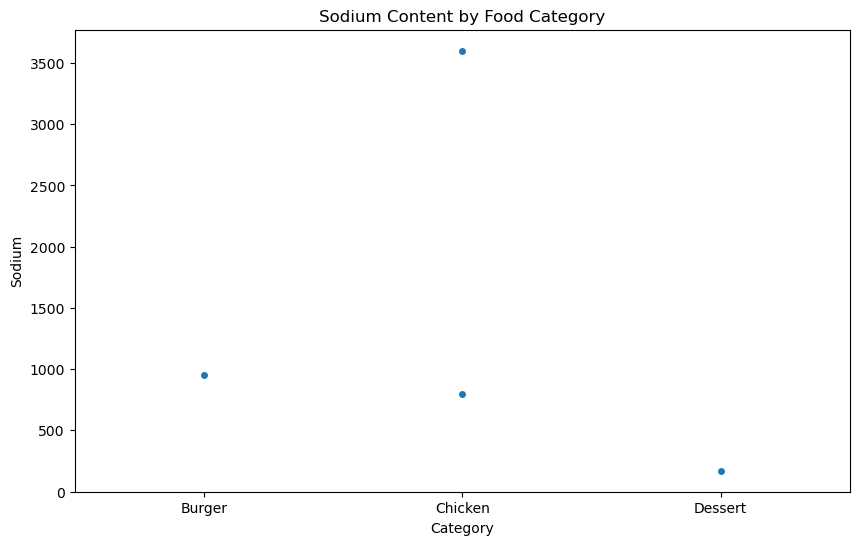

In [28]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="Category", y="Sodium", data=df)
plt.title("Sodium Content by Food Category")
plt.show()

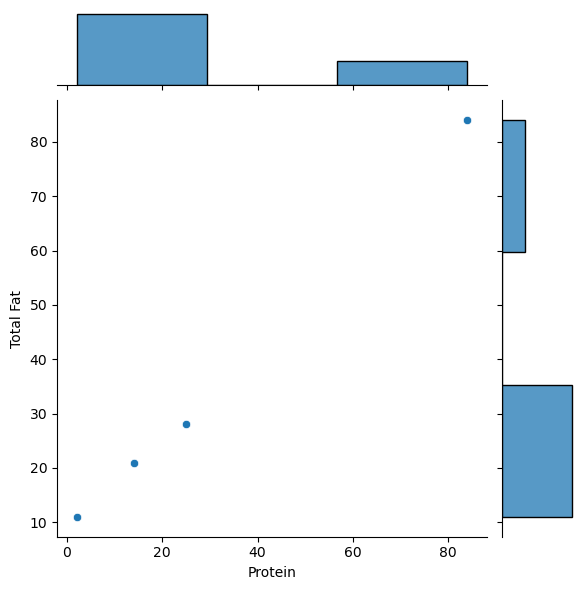

In [30]:
sns.jointplot(x="Protein", y="Total Fat", data=df, kind="scatter")
plt.show()

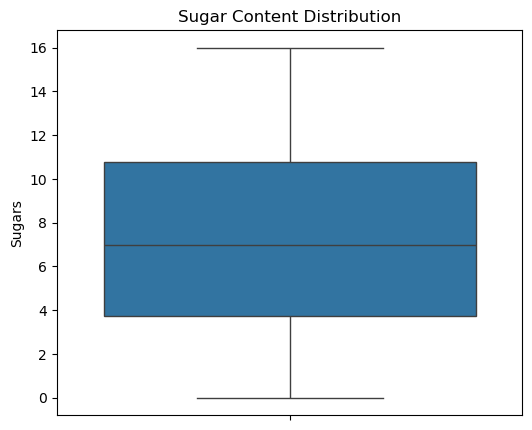

In [32]:
plt.figure(figsize=(6,5))
sns.boxplot(y="Sugars", data=df)
plt.title("Sugar Content Distribution")
plt.show()

In [36]:
df.to_csv("mcdonalds_data.csv", index=False)
